# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from L2.sga import SGA
from L2.mutation import reverse_sequence_mutation, transposition_mutation
from L2.replacement import mu_plus_lambda_replacement
from L2.genetic_operator import pmx

%matplotlib inline

## Input data

In [3]:
# kroa200

n = 200
print('Problem size: %d' % n)

coords = np.array([[ 1357.,  1905.],
       [ 2650.,   802.],
       [ 1774.,   107.],
       [ 1307.,   964.],
       [ 3806.,   746.],
       [ 2687.,  1353.],
       [   43.,  1957.],
       [ 3092.,  1668.],
       [  185.,  1542.],
       [  834.,   629.],
       [   40.,   462.],
       [ 1183.,  1391.],
       [ 2048.,  1628.],
       [ 1097.,   643.],
       [ 1838.,  1732.],
       [  234.,  1118.],
       [ 3314.,  1881.],
       [  737.,  1285.],
       [  779.,   777.],
       [ 2312.,  1949.],
       [ 2576.,   189.],
       [ 3078.,  1541.],
       [ 2781.,   478.],
       [  705.,  1812.],
       [ 3409.,  1917.],
       [  323.,  1714.],
       [ 1660.,  1556.],
       [ 3729.,  1188.],
       [  693.,  1383.],
       [ 2361.,   640.],
       [ 2433.,  1538.],
       [  554.,  1825.],
       [  913.,   317.],
       [ 3586.,  1909.],
       [ 2636.,   727.],
       [ 1000.,   457.],
       [  482.,  1337.],
       [ 3704.,  1082.],
       [ 3635.,  1174.],
       [ 1362.,  1526.],
       [ 2049.,   417.],
       [ 2552.,  1909.],
       [ 3939.,   640.],
       [  219.,   898.],
       [  812.,   351.],
       [  901.,  1552.],
       [ 2513.,  1572.],
       [  242.,   584.],
       [  826.,  1226.],
       [ 3278.,   799.],
       [   86.,  1065.],
       [   14.,   454.],
       [ 1327.,  1893.],
       [ 2773.,  1286.],
       [ 2469.,  1838.],
       [ 3835.,   963.],
       [ 1031.,   428.],
       [ 3853.,  1712.],
       [ 1868.,   197.],
       [ 1544.,   863.],
       [  457.,  1607.],
       [ 3174.,  1064.],
       [  192.,  1004.],
       [ 2318.,  1925.],
       [ 2232.,  1374.],
       [  396.,   828.],
       [ 2365.,  1649.],
       [ 2499.,   658.],
       [ 1410.,   307.],
       [ 2990.,   214.],
       [ 3646.,  1018.],
       [ 3394.,  1028.],
       [ 1779.,    90.],
       [ 1058.,   372.],
       [ 2933.,  1459.],
       [ 3099.,   173.],
       [ 2178.,   978.],
       [  138.,  1610.],
       [ 2082.,  1753.],
       [ 2302.,  1127.],
       [  805.,   272.],
       [   22.,  1617.],
       [ 3213.,  1085.],
       [   99.,   536.],
       [ 1533.,  1780.],
       [ 3564.,   676.],
       [   29.,     6.],
       [ 3808.,  1375.],
       [ 2221.,   291.],
       [ 3499.,  1885.],
       [ 3124.,   408.],
       [  781.,   671.],
       [ 1027.,  1041.],
       [ 3249.,   378.],
       [ 3297.,   491.],
       [  213.,   220.],
       [  721.,   186.],
       [ 3736.,  1542.],
       [  868.,   731.],
       [  960.,   303.],
       [ 1380.,   939.],
       [ 2848.,    96.],
       [ 3510.,  1671.],
       [  457.,   334.],
       [ 3888.,   666.],
       [  984.,   965.],
       [ 2721.,  1482.],
       [ 1286.,   525.],
       [ 2716.,  1432.],
       [  738.,  1325.],
       [ 1251.,  1832.],
       [ 2728.,  1698.],
       [ 3815.,   169.],
       [ 3683.,  1533.],
       [ 1247.,  1945.],
       [  123.,   862.],
       [ 1234.,  1946.],
       [  252.,  1240.],
       [  611.,   673.],
       [ 2576.,  1676.],
       [  928.,  1700.],
       [   53.,   857.],
       [ 1807.,  1711.],
       [  274.,  1420.],
       [ 2574.,   946.],
       [  178.,    24.],
       [ 2678.,  1825.],
       [ 1795.,   962.],
       [ 3384.,  1498.],
       [ 3520.,  1079.],
       [ 1256.,    61.],
       [ 1424.,  1728.],
       [ 3913.,   192.],
       [ 3085.,  1528.],
       [ 2573.,  1969.],
       [  463.,  1670.],
       [ 3875.,   598.],
       [  298.,  1513.],
       [ 3479.,   821.],
       [ 2542.,   236.],
       [ 3955.,  1743.],
       [ 1323.,   280.],
       [ 3447.,  1830.],
       [ 2936.,   337.],
       [ 1621.,  1830.],
       [ 3373.,  1646.],
       [ 1393.,  1368.],
       [ 3874.,  1318.],
       [  938.,   955.],
       [ 3022.,   474.],
       [ 2482.,  1183.],
       [ 3854.,   923.],
       [  376.,   825.],
       [ 2519.,   135.],
       [ 2945.,  1622.],
       [  953.,   268.],
       [ 2628.,  1479.],
       [ 2097.,   981.],
       [  890.,  1846.],
       [ 2139.,  1806.],
       [ 2421.,  1007.],
       [ 2290.,  1810.],
       [ 1115.,  1052.],
       [ 2588.,   302.],
       [  327.,   265.],
       [  241.,   341.],
       [ 1917.,   687.],
       [ 2991.,   792.],
       [ 2573.,   599.],
       [   19.,   674.],
       [ 3911.,  1673.],
       [  872.,  1559.],
       [ 2863.,   558.],
       [  929.,  1766.],
       [  839.,   620.],
       [ 3893.,   102.],
       [ 2178.,  1619.],
       [ 3822.,   899.],
       [  378.,  1048.],
       [ 1178.,   100.],
       [ 2599.,   901.],
       [ 3416.,   143.],
       [ 2961.,  1605.],
       [  611.,  1384.],
       [ 3113.,   885.],
       [ 2597.,  1830.],
       [ 2586.,  1286.],
       [  161.,   906.],
       [ 1429.,   134.],
       [  742.,  1025.],
       [ 1625.,  1651.],
       [ 1187.,   706.],
       [ 1787.,  1009.],
       [   22.,   987.],
       [ 3640.,    43.],
       [ 3756.,   882.],
       [  776.,   392.],
       [ 1724.,  1642.],
       [  198.,  1810.],
       [ 3950.,  1558.]])

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

# p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
# print('Optimal solution:\n', p)

Problem size: 200
Distance matrix:
 [[    0.          1699.54641008  1845.72289361 ...,   451.50636762
   1162.88692486  2616.11505863]
 [ 1699.54641008     0.          1118.21330702 ...,  1250.23037877
   2651.10693862  1503.84041707]
 [ 1845.72289361  1118.21330702     0.         ...,  1535.81411636
   2320.34156968  2615.41143991]
 ..., 
 [  451.50636762  1250.23037877  1535.81411636 ...,     0.          1535.21985396
   2227.58434184]
 [ 1162.88692486  2651.10693862  2320.34156968 ...,  1535.21985396     0.
   3760.45316418]
 [ 2616.11505863  1503.84041707  2615.41143991 ...,  2227.58434184
   3760.45316418     0.        ]]


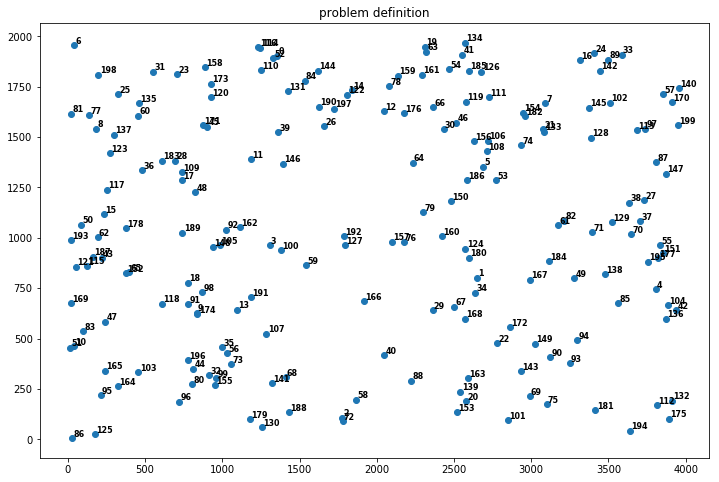

In [4]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('problem definition')

plt.show()

## Objective function

In [5]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

## SGA-PMX

In [13]:
sga_pmx = SGA(tsp_objective_function, chromosome_length=n, 
              mutation=reverse_sequence_mutation,
              replacement=mu_plus_lambda_replacement,
              genetic_operator=pmx)

In [14]:
best, best_chromosome = sga_pmx.evolve(population_size=50,
                                       number_of_iterations=2500,
                                       crossover_probability=0.95,
                                       mutation_probability=0.35)

  0     0.04313755 309012.61828752 330158.16940744 340547.77328729 8299.05185134
  1     0.07521939 307825.01848945 320205.76825892 329815.94386803 6017.07131431
  2     0.10805273 303781.14468072 315395.86531253 319949.27236092 3831.22283810
  3     0.13670111 303781.14468072 311919.09037873 316438.94718570 3675.59520921
  4     0.16279244 297562.44678550 307125.75746025 311290.28825513 3097.96067174
  5     0.18628502 286124.03317513 303711.74242603 307295.21822878 3607.52167968
  6     0.21164465 286124.03317513 297909.48653416 303781.14468072 5909.73708317
  7     0.23704839 280520.46156279 291078.09365637 298258.30779677 4715.19143700
  8     0.25903559 280520.46156279 286397.71150408 288984.93401777 1875.64608710
  9     0.27856803 278161.30438995 284107.07025384 286124.03317513 1765.42114837
 10     0.30027747 277909.00269806 282424.13100503 283955.73702779 1440.77350025
 11     0.32144117 272102.04593555 280692.68326427 282845.38148297 1988.47028275
 12     0.34513426 270076.38

104     2.15683508 169145.23633549 171480.50249024 171657.35065390 432.27906795
105     2.17408705 167547.51340148 170724.92326553 171614.93839037 1097.31115747
106     2.19115067 167547.51340148 169530.01498985 171061.92900735 877.57226532
107     2.20968509 167485.61678025 169092.98365068 169751.62470788 824.94862976
108     2.22945952 166662.99474960 168197.06117557 169512.74308571 778.81412330
109     2.24671912 166002.67036510 167429.48182511 168330.37196258 399.84286779
110     2.26474547 166002.67036510 167108.15532628 167547.51340148 468.42008646
111     2.28851962 165607.02679758 166810.49072038 167485.61678025 519.36595311
112     2.30854797 164618.60106239 166427.18183331 167131.64065567 505.08968037
113     2.32832623 164094.33156842 166069.19826410 166662.99474960 478.87254586
114     2.34675169 164094.33156842 165617.39002429 166002.67036510 589.42963411
115     2.36567426 162996.31714249 164801.13341997 165844.29879599 697.06452252
116     2.38414764 162810.82251995 1641

209     4.06374145 123130.89924248 123918.99770312 124143.10143239 263.49917399
210     4.08442497 122539.80245441 123684.85664779 124125.42469361 333.25350160
211     4.10349727 122539.80245441 123448.63011825 123863.96994455 345.30047539
212     4.12710404 122539.80245441 123155.42750128 123502.13854794 223.10956584
213     4.14615226 122015.92091543 122904.39900940 123130.89924248 327.94429164
214     4.16691256 121954.22128499 122598.69475257 123130.89924248 324.99164127
215     4.18342614 121342.30765157 122268.11716781 122539.80245441 340.46908872
216     4.20210147 120865.93058191 121988.88696896 122539.80245441 377.22566261
217     4.22192883 120865.93058191 121772.46958709 122049.50857197 291.38796267
218     4.23715973 120487.07567942 121416.89082052 121711.03078223 250.13781583
219     4.25581384 120487.07567942 121290.68280031 121530.15032682 242.67278820
220     4.27503347 120487.07567942 121144.84984921 121458.41178390 235.62687231
221     4.29391813 120487.07567942 12094

319     5.97828817 97794.88366986 97969.37212804 98252.63080094 122.80186794
320     5.99663067 97794.88366986 97897.70071182 97926.49967362  46.41990656
321     6.01591229 97561.93504694 97846.63209186 97926.49967362  60.47023411
322     6.02990651 97457.36530378 97800.91710241 97827.24487498  76.32087489
323     6.04474616 97300.55708208 97639.27645902 97827.24487498 154.94306803
324     6.06204247 97260.23607179 97516.37596185 97623.52206536  87.33518896
325     6.07804847 97122.69554322 97430.61469429 97561.93504694 102.44992565
326     6.09830189 97122.69554322 97367.43943223 97457.36530378 110.97218771
327     6.11710525 97101.97845453 97259.17923676 97446.63315839 120.09289068
328     6.13656330 96966.43624096 97198.59649941 97395.77828536  98.71259727
329     6.15764403 96634.08497186 97120.81955410 97163.56547295  81.93764208
330     6.18022609 96634.08497186 97071.25330430 97163.56547295 129.61341697
331     6.19827533 96634.08497186 96960.40366215 97122.69554322 189.54724645

437     7.63602471 81228.74195444 81263.28953102 81329.91951934  47.83402856
438     7.64800453 80854.20946217 81221.25130459 81228.74195444  52.43454892
439     7.66056299 80350.59168695 80986.04039539 81228.74195444 201.72368288
440     7.67506909 80350.59168695 80828.98426473 80854.20946217 103.92059985
441     7.69201207 80350.59168695 80586.57867344 80854.20946217 238.39332274
442     7.70626760 80350.59168695 80350.59168695 80350.59168695   0.00000000
443     7.71808529 80288.03111725 80349.34047556 80350.59168695   8.75847976
444     7.73013997 80288.03111725 80308.05049955 80350.59168695  29.18301380
445     7.74212050 80288.03111725 80288.03111725 80288.03111725   0.00000000
446     7.75464225 80274.39820912 80287.75845909 80288.03111725   1.90860714
447     7.76664209 79709.97586790 80269.10824187 80288.03111725  80.15762317
448     7.77819562 79455.27623215 79971.32320893 80274.39820912 286.10346554
449     7.79159665 79455.27623215 79704.88187518 79709.97586790  35.65794900

560     9.29646301 67146.67133088 67371.58191091 67729.81839950 281.21925743
561     9.30831766 67146.67133088 67146.67133088 67146.67133088   0.00000000
562     9.32094240 66590.35880191 67135.54508030 67146.67133088  77.88375406
563     9.33284426 66590.35880191 66730.88109955 67146.67133088 238.71460193
564     9.34460473 66590.35880191 66590.35880191 66590.35880191   0.00000000
565     9.35696602 66041.51397238 66572.42787855 66590.35880191  83.56650086
566     9.36886263 65825.44277151 66325.61525468 66590.35880191 250.81312270
567     9.38068104 65825.44277151 66064.92833772 66374.28760104 128.00218931
568     9.39293504 65825.44277151 65998.29973220 66041.51397238  86.42848035
569     9.40478539 65825.44277151 65825.44277151 65825.44277151   0.00000000
570     9.41662049 65393.97191604 65814.10010508 65825.44277151  62.95055197
571     9.42977619 65258.30945026 65575.58570654 65825.44277151 211.12848083
572     9.44216347 65258.30945026 65374.97917083 65393.97191604  47.07311628

676    10.74313450 58634.18603469 58634.18603469 58634.18603469   0.00000000
677    10.75557828 58634.18603469 58634.18603469 58634.18603469   0.00000000
678    10.76788163 58634.18603469 58634.18603469 58634.18603469   0.00000000
679    10.78001285 58634.18603469 58634.18603469 58634.18603469   0.00000000
680    10.79226708 57962.15038611 58620.74532172 58634.18603469  94.08499080
681    10.80460525 57962.15038611 58229.16955002 58634.18603469 327.26428666
682    10.81733584 57747.44390345 57957.85625646 57962.15038611  30.05890757
683    10.82946277 57747.44390345 57818.94806913 57962.15038611 100.15118371
684    10.84204412 57747.44390345 57747.44390345 57747.44390345   0.00000000
685    10.85418916 57731.87182051 57747.13246180 57747.44390345   2.18009161
686    10.86637020 57611.55320544 57733.20274811 57747.44390345  18.59993437
687    10.87866902 57611.55320544 57721.59134530 57731.87182051  32.77022571
688    10.89098692 57611.55320544 57643.79992243 57731.87182051  51.17368381

794    12.19033051 53969.01020962 53969.01020962 53969.01020962   0.00000000
795    12.20266438 53969.01020962 53969.01020962 53969.01020962   0.00000000
796    12.21484375 53969.01020962 53969.01020962 53969.01020962   0.00000000
797    12.22722888 53969.01020962 53969.01020962 53969.01020962   0.00000000
798    12.23952007 53969.01020962 53969.01020962 53969.01020962   0.00000000
799    12.25110960 53969.01020962 53969.01020962 53969.01020962   0.00000000
800    12.26329327 53755.97926784 53964.74959078 53969.01020962  29.82433185
801    12.27569580 53755.97926784 53836.93102571 53969.01020962 103.40233129
802    12.28791571 53755.97926784 53755.97926784 53755.97926784   0.00000000
803    12.29989791 53755.97926784 53755.97926784 53755.97926784   0.00000000
804    12.31177282 53755.97926784 53755.97926784 53755.97926784   0.00000000
805    12.32353926 53732.67263011 53755.51313508 53755.97926784   3.26292928
806    12.33449435 53512.84304126 53736.20029516 53755.97926784  33.74528597

913    13.64059973 51721.39339085 51721.39339085 51721.39339085   0.00000000
914    13.65418887 51721.39339085 51721.39339085 51721.39339085   0.00000000
915    13.66612339 51721.39339085 51721.39339085 51721.39339085   0.00000000
916    13.67862153 51721.39339085 51721.39339085 51721.39339085   0.00000000
917    13.69082952 51721.39339085 51721.39339085 51721.39339085   0.00000000
918    13.70285702 51721.39339085 51721.39339085 51721.39339085   0.00000000
919    13.71488047 51721.39339085 51721.39339085 51721.39339085   0.00000000
920    13.72741795 51721.39339085 51721.39339085 51721.39339085   0.00000000
921    13.73944736 51721.39339085 51721.39339085 51721.39339085   0.00000000
922    13.75164533 51721.39339085 51721.39339085 51721.39339085   0.00000000
923    13.76369619 51721.39339085 51721.39339085 51721.39339085   0.00000000
924    13.77587581 51687.45016188 51720.71452627 51721.39339085   4.75205206
925    13.78743148 51542.75475062 51691.56549163 51721.39339085  29.43211698

1032    15.08321500 48419.98478076 48419.98478076 48419.98478076   0.00000000
1033    15.09540200 48377.71706601 48419.13942647 48419.98478076   5.91748007
1034    15.10756612 48348.91542229 48391.51205615 48419.98478076  20.82592716
1035    15.12079692 48348.91542229 48375.41293451 48377.71706601   7.81369007
1036    15.13305092 48348.91542229 48358.70798115 48377.71706601  13.64359126
1037    15.14523196 48348.91542229 48348.91542229 48348.91542229   0.00000000
1038    15.15763760 48348.91542229 48348.91542229 48348.91542229   0.00000000
1039    15.16975284 48348.91542229 48348.91542229 48348.91542229   0.00000000
1040    15.18198609 48348.91542229 48348.91542229 48348.91542229   0.00000000
1041    15.19428563 48348.91542229 48348.91542229 48348.91542229   0.00000000
1042    15.20665026 48348.91542229 48348.91542229 48348.91542229   0.00000000
1043    15.21934319 48348.91542229 48348.91542229 48348.91542229   0.00000000
1044    15.23118472 48348.91542229 48348.91542229 48348.91542229

1150    16.52461767 47383.06178415 47383.06178415 47383.06178415   0.00000000
1151    16.53693032 47383.06178415 47383.06178415 47383.06178415   0.00000000
1152    16.54908371 47383.06178415 47383.06178415 47383.06178415   0.00000000
1153    16.56069303 47383.06178415 47383.06178415 47383.06178415   0.00000000
1154    16.57233977 47383.06178415 47383.06178415 47383.06178415   0.00000000
1155    16.58413672 47383.06178415 47383.06178415 47383.06178415   0.00000000
1156    16.59662724 47383.06178415 47383.06178415 47383.06178415   0.00000000
1157    16.60852432 47383.06178415 47383.06178415 47383.06178415   0.00000000
1158    16.62113667 47195.26017054 47376.36157372 47383.06178415  33.07424001
1159    16.63322830 47048.05126283 47272.10238505 47383.06178415  99.65791423
1160    16.64644837 47048.05126283 47165.16856965 47235.85287643  67.08120660
1161    16.65781307 47048.05126283 47106.93482591 47195.26017054  72.11734190
1162    16.66989422 47048.05126283 47048.05126283 47048.05126283

1269    17.97075629 43680.99562010 43680.99562010 43680.99562010   0.00000000
1270    17.98379874 43680.99562010 43680.99562010 43680.99562010   0.00000000
1271    17.99587154 43680.99562010 43680.99562010 43680.99562010   0.00000000
1272    18.00799584 43680.99562010 43680.99562010 43680.99562010   0.00000000
1273    18.02045012 43605.23230135 43679.48035373 43680.99562010  10.60686462
1274    18.03263378 43605.23230135 43635.53762885 43680.99562010  37.11629443
1275    18.04485846 43605.23230135 43605.23230135 43605.23230135   0.00000000
1276    18.05711675 43605.23230135 43605.23230135 43605.23230135   0.00000000
1277    18.06965566 43605.23230135 43605.23230135 43605.23230135   0.00000000
1278    18.08192253 43605.23230135 43605.23230135 43605.23230135   0.00000000
1279    18.09340549 43605.23230135 43605.23230135 43605.23230135   0.00000000
1280    18.10559249 43605.23230135 43605.23230135 43605.23230135   0.00000000
1281    18.11721706 43605.23230135 43605.23230135 43605.23230135

1388    19.41126800 42252.49777747 42252.49777747 42252.49777747   0.00000000
1389    19.42389584 42252.49777747 42252.49777747 42252.49777747   0.00000000
1390    19.43628311 42252.49777747 42252.49777747 42252.49777747   0.00000000
1391    19.44802523 42252.49777747 42252.49777747 42252.49777747   0.00000000
1392    19.46024609 42252.49777747 42252.49777747 42252.49777747   0.00000000
1393    19.47159004 42231.74044467 42252.08263082 42252.49777747   2.90602659
1394    19.48405480 41989.97479512 42233.96262483 42252.49777747  36.20178498
1395    19.49571514 41989.97479512 42178.55200177 42231.74044467 100.15052665
1396    19.50742674 41989.97479512 42028.65729904 42231.74044467  88.63275116
1397    19.51956463 41989.97479512 41989.97479512 41989.97479512   0.00000000
1398    19.53194690 41989.97479512 41989.97479512 41989.97479512   0.00000000
1399    19.54397464 41989.97479512 41989.97479512 41989.97479512   0.00000000
1400    19.55635977 41989.97479512 41989.97479512 41989.97479512

1506    20.85379648 40854.20270495 41154.17727451 41160.29920450  42.85350994
1507    20.86608076 40757.82482279 40976.66604108 41160.29920450 151.18566277
1508    20.87878251 40757.82482279 40852.27514730 40854.20270495  13.49290350
1509    20.89085007 40563.09340786 40786.69867442 40854.20270495  55.52354337
1510    20.90278578 40563.09340786 40742.24630960 40757.82482279  52.82930857
1511    20.91505790 40563.09340786 40609.82894744 40757.82482279  83.16650221
1512    20.92686176 40563.09340786 40563.09340786 40563.09340786   0.00000000
1513    20.93876648 40563.09340786 40563.09340786 40563.09340786   0.00000000
1514    20.95072889 40563.09340786 40563.09340786 40563.09340786   0.00000000
1515    20.96236396 40563.09340786 40563.09340786 40563.09340786   0.00000000
1516    20.97449398 40563.09340786 40563.09340786 40563.09340786   0.00000000
1517    20.98671222 40563.09340786 40563.09340786 40563.09340786   0.00000000
1518    20.99889350 40563.09340786 40563.09340786 40563.09340786

1625    22.29438329 38956.59072424 39237.52579088 39243.25915959  40.13358095
1626    22.30655289 38956.59072424 39042.59125484 39243.25915959 131.36798043
1627    22.31838346 38956.59072424 38956.59072424 38956.59072424   0.00000000
1628    22.33015847 38956.59072424 38956.59072424 38956.59072424   0.00000000
1629    22.34241867 38956.59072424 38956.59072424 38956.59072424   0.00000000
1630    22.35411215 38956.59072424 38956.59072424 38956.59072424   0.00000000
1631    22.36584735 38956.59072424 38956.59072424 38956.59072424   0.00000000
1632    22.37830138 38956.59072424 38956.59072424 38956.59072424   0.00000000
1633    22.39087415 38956.59072424 38956.59072424 38956.59072424   0.00000000
1634    22.40242910 38956.59072424 38956.59072424 38956.59072424   0.00000000
1635    22.41430831 38956.59072424 38956.59072424 38956.59072424   0.00000000
1636    22.42583585 38956.59072424 38956.59072424 38956.59072424   0.00000000
1637    22.43772364 38956.59072424 38956.59072424 38956.59072424

1744    23.72174835 38332.16060543 38332.16060543 38332.16060543   0.00000000
1745    23.73402166 38324.81227016 38332.01363873 38332.16060543   1.02876694
1746    23.74591470 38324.81227016 38327.60463756 38332.16060543   3.56678233
1747    23.75815535 38324.81227016 38324.81227016 38324.81227016   0.00000000
1748    23.77021837 38324.81227016 38324.81227016 38324.81227016   0.00000000
1749    23.78262377 38319.45066243 38324.70503801 38324.81227016   0.75062508
1750    23.79459357 38319.45066243 38320.84468044 38324.81227016   2.35178475
1751    23.80599809 38319.45066243 38319.45066243 38319.45066243   0.00000000
1752    23.81775331 38319.45066243 38319.45066243 38319.45066243   0.00000000
1753    23.82953215 38319.45066243 38319.45066243 38319.45066243   0.00000000
1754    23.84178090 38319.45066243 38319.45066243 38319.45066243   0.00000000
1755    23.85395432 38319.45066243 38319.45066243 38319.45066243   0.00000000
1756    23.86588073 38319.45066243 38319.45066243 38319.45066243

1863    25.16132331 37659.40227415 37659.40227415 37659.40227415   0.00000000
1864    25.17357492 37659.40227415 37659.40227415 37659.40227415   0.00000000
1865    25.18564034 37659.40227415 37659.40227415 37659.40227415   0.00000000
1866    25.19738173 37659.40227415 37659.40227415 37659.40227415   0.00000000
1867    25.20991349 37589.18791159 37657.99798690 37659.40227415   9.83001076
1868    25.22164154 37589.18791159 37604.63507135 37659.40227415  29.08604014
1869    25.23376560 37589.18791159 37589.18791159 37589.18791159   0.00000000
1870    25.24550176 37589.18791159 37589.18791159 37589.18791159   0.00000000
1871    25.25770879 37589.18791159 37589.18791159 37589.18791159   0.00000000
1872    25.26975441 37589.18791159 37589.18791159 37589.18791159   0.00000000
1873    25.28177071 37589.18791159 37589.18791159 37589.18791159   0.00000000
1874    25.29347277 37585.48104431 37589.11377425 37589.18791159   0.51896142
1875    25.30515361 37585.48104431 37586.88965388 37589.18791159

1982    26.59554195 37343.71198036 37343.71198036 37343.71198036   0.00000000
1983    26.60833526 37343.71198036 37343.71198036 37343.71198036   0.00000000
1984    26.62064266 37343.71198036 37343.71198036 37343.71198036   0.00000000
1985    26.63298845 37343.71198036 37343.71198036 37343.71198036   0.00000000
1986    26.64523911 37343.71198036 37343.71198036 37343.71198036   0.00000000
1987    26.65712786 37343.71198036 37343.71198036 37343.71198036   0.00000000
1988    26.66885424 37289.89838552 37342.63570846 37343.71198036   7.53390328
1989    26.68091083 37289.89838552 37307.11873587 37343.71198036  25.10275863
1990    26.69269633 37289.89838552 37289.89838552 37289.89838552   0.00000000
1991    26.70473599 37289.89838552 37289.89838552 37289.89838552   0.00000000
1992    26.71692276 37289.89838552 37289.89838552 37289.89838552   0.00000000
1993    26.72896194 37289.89838552 37289.89838552 37289.89838552   0.00000000
1994    26.74108362 37289.89838552 37289.89838552 37289.89838552

2101    28.03309941 36902.30909020 37131.71467250 37136.39641907  32.77222604
2102    28.04573226 36902.30909020 37000.62576833 37136.39641907 115.53579259
2103    28.05802798 36902.30909020 36902.30909020 36902.30909020   0.00000000
2104    28.06961536 36902.30909020 36902.30909020 36902.30909020   0.00000000
2105    28.08185244 36902.30909020 36902.30909020 36902.30909020   0.00000000
2106    28.09384608 36902.30909020 36902.30909020 36902.30909020   0.00000000
2107    28.10645318 36902.30909020 36902.30909020 36902.30909020   0.00000000
2108    28.11874628 36902.30909020 36902.30909020 36902.30909020   0.00000000
2109    28.13059068 36902.30909020 36902.30909020 36902.30909020   0.00000000
2110    28.14292932 36902.30909020 36902.30909020 36902.30909020   0.00000000
2111    28.15495825 36902.30909020 36902.30909020 36902.30909020   0.00000000
2112    28.16734481 36902.30909020 36902.30909020 36902.30909020   0.00000000
2113    28.17925668 36902.30909020 36902.30909020 36902.30909020

2220    29.47269726 36519.43082131 36519.43082131 36519.43082131   0.00000000
2221    29.48480248 36519.43082131 36519.43082131 36519.43082131   0.00000000
2222    29.49693894 36519.43082131 36519.43082131 36519.43082131   0.00000000
2223    29.50879669 36519.43082131 36519.43082131 36519.43082131   0.00000000
2224    29.52053475 36519.43082131 36519.43082131 36519.43082131   0.00000000
2225    29.53186584 36519.43082131 36519.43082131 36519.43082131   0.00000000
2226    29.54312658 36519.43082131 36519.43082131 36519.43082131   0.00000000
2227    29.55500960 36519.43082131 36519.43082131 36519.43082131   0.00000000
2228    29.56728125 36519.43082131 36519.43082131 36519.43082131   0.00000000
2229    29.57976246 36519.43082131 36519.43082131 36519.43082131   0.00000000
2230    29.59198904 36519.43082131 36519.43082131 36519.43082131   0.00000000
2231    29.60387087 36519.43082131 36519.43082131 36519.43082131   0.00000000
2232    29.61632204 36519.43082131 36519.43082131 36519.43082131

2339    30.90836048 36290.87780777 36290.87780777 36290.87780777   0.00000000
2340    30.92074347 36290.87780777 36290.87780777 36290.87780777   0.00000000
2341    30.93224907 36290.87780777 36290.87780777 36290.87780777   0.00000000
2342    30.94484735 36290.87780777 36290.87780777 36290.87780777   0.00000000
2343    30.95642281 36290.87780777 36290.87780777 36290.87780777   0.00000000
2344    30.96817827 36290.87780777 36290.87780777 36290.87780777   0.00000000
2345    30.97973394 36290.87780777 36290.87780777 36290.87780777   0.00000000
2346    30.99182200 36290.87780777 36290.87780777 36290.87780777   0.00000000
2347    31.00377774 36290.87780777 36290.87780777 36290.87780777   0.00000000
2348    31.01642442 36227.26443266 36289.60554026 36290.87780777   8.90587251
2349    31.02869391 36227.26443266 36253.98205021 36290.87780777  31.39692245
2350    31.04058170 36227.26443266 36227.26443266 36227.26443266   0.00000000
2351    31.05270696 36227.26443266 36227.26443266 36227.26443266

2458    32.34498262 36153.57075115 36153.57075115 36153.57075115   0.00000000
2459    32.35730672 36153.57075115 36153.57075115 36153.57075115   0.00000000
2460    32.36957741 36153.57075115 36153.57075115 36153.57075115   0.00000000
2461    32.38153911 36153.57075115 36153.57075115 36153.57075115   0.00000000
2462    32.39389253 36153.57075115 36153.57075115 36153.57075115   0.00000000
2463    32.40651321 36153.57075115 36153.57075115 36153.57075115   0.00000000
2464    32.41847777 36153.57075115 36153.57075115 36153.57075115   0.00000000
2465    32.43016171 36153.57075115 36153.57075115 36153.57075115   0.00000000
2466    32.44216228 36153.57075115 36153.57075115 36153.57075115   0.00000000
2467    32.45429468 36153.57075115 36153.57075115 36153.57075115   0.00000000
2468    32.46636200 36153.57075115 36153.57075115 36153.57075115   0.00000000
2469    32.47855926 36153.57075115 36153.57075115 36153.57075115   0.00000000
2470    32.49070358 36153.57075115 36153.57075115 36153.57075115

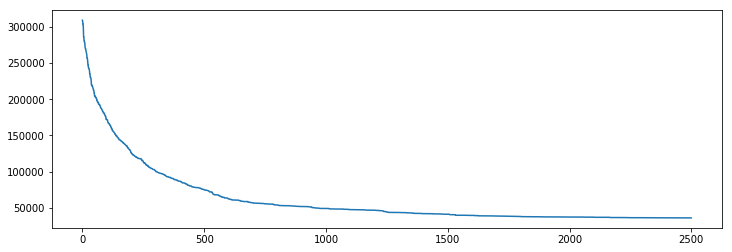

In [15]:
plt.figure(figsize=(12,4))
plt.plot(best)
plt.show()

In [16]:
best

array([ 309012.61828752,  307825.01848945,  303781.14468072, ...,
         36064.2413582 ,   36064.2413582 ,   36064.2413582 ])

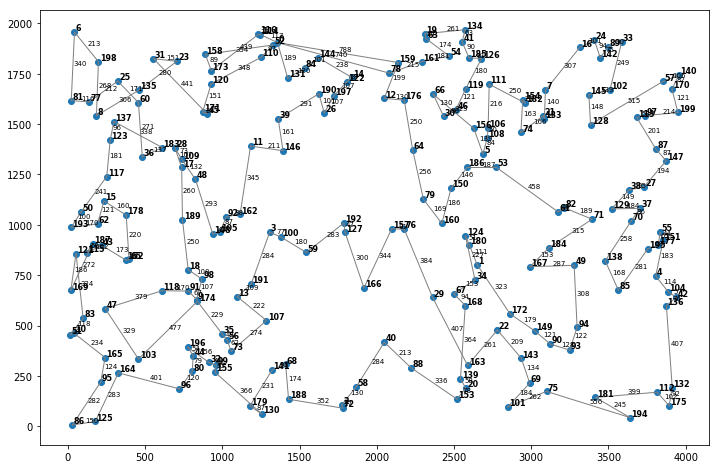

In [17]:
from matplotlib.lines import Line2D

route = best_chromosome
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [25]:
coords[0, 0]

1150.0

In [29]:
route

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])

In [35]:
best_chromosome

array([23, 12,  3,  9, 19,  1, 28,  2, 25,  8,  4, 20,  5, 11, 27,  0,  7,
       26, 22,  6, 24, 10, 21, 16, 13, 17, 14, 18, 15])

In [40]:
opt = np.array([1,
28,
6,
12,
9,
26,
3,
29,
5,
21,
2,
20,
10,
4,
15,
18,
14,
17,
22,
11,
19,
25,
7,
23,
8,
27,
16,
13,
24]) - 1

In [38]:
len(opt)

29

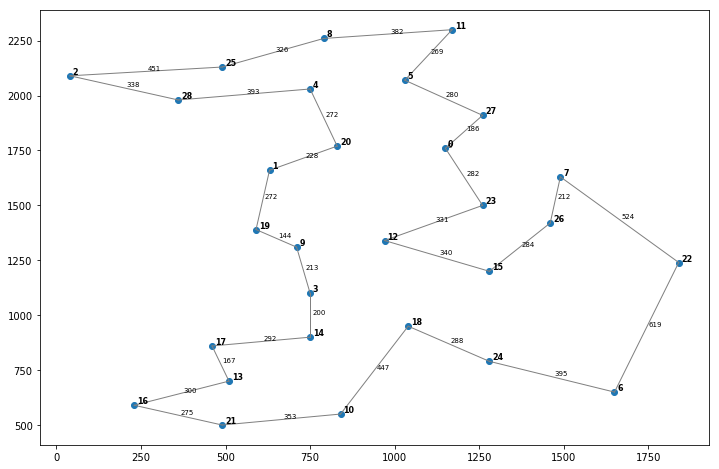

In [41]:
from matplotlib.lines import Line2D

route = opt
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [42]:
tsp_objective_function(opt)

9074.1480478728427